In [1]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
df.duplicated().sum()

0

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

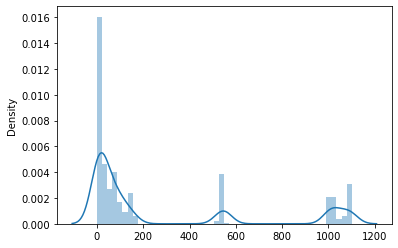

In [5]:
sp.distplot(df)

In [6]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
x=df.drop("TEY",axis=1)
y=df["TEY"]

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

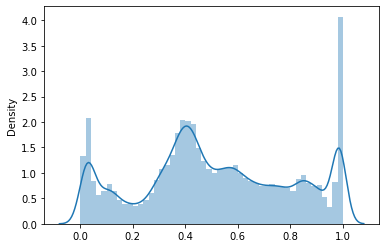

In [8]:
scale=MinMaxScaler()
norm=scale.fit_transform(x)
sp.distplot(norm)

In [9]:
x=norm

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [11]:
x_train.shape

(10076, 10)

In [12]:
y_train.shape

(10076,)

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,),activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="relu")
])

In [14]:
model.compile(optimizer="adam",loss="MSE",metrics=["MSE"])

In [15]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
315/315 [==============================] - 46s 53ms/step - loss: 10587.3330 - MSE: 10587.3330
Epoch 2/5
315/315 [==============================] - 10s 33ms/step - loss: 3765.3469 - MSE: 3765.3469
Epoch 3/5
315/315 [==============================] - 10s 33ms/step - loss: 3721.2271 - MSE: 3721.2271
Epoch 4/5
315/315 [==============================] - 14s 43ms/step - loss: 3692.7927 - MSE: 3692.7927
Epoch 5/5
315/315 [==============================] - 13s 43ms/step - loss: 3679.1775 - MSE: 3679.1775


In [16]:
preds=model.predict(x_test)
preds

156/156 [==============================] - 29s 7ms/step


array([[135.64935 , 135.64153 ,   0.      , ..., 135.61693 ,   0.      ,
        135.62328 ],
       [109.84116 , 109.71394 ,   0.      , ..., 109.86145 ,   0.      ,
        109.909775],
       [137.93262 , 137.88965 ,   0.      , ..., 137.88419 ,   0.      ,
        137.92682 ],
       ...,
       [139.26819 , 139.18039 ,   0.      , ..., 139.16112 ,   0.      ,
        139.26184 ],
       [134.37688 , 134.36728 ,   0.      , ..., 134.34662 ,   0.      ,
        134.3537  ],
       [132.48671 , 132.50955 ,   0.      , ..., 132.46768 ,   0.      ,
        132.44586 ]], dtype=float32)

In [17]:
y_test.shape

(4963,)

In [18]:
preds.shape

(4963, 10)